# This is a practice using market data to make observations. The goal of this work is to find the returns from the S&P 500. The data spreads over the course of twenty one years, and was collected from yahoo finance. 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('/Users/memphisandom/Desktop/^GSPC.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-02-01,1394.459961,1444.550049,1325.069946,1366.420044,1366.420044,20912000000
1,2000-03-01,1366.420044,1552.869995,1346.619995,1498.579956,1498.579956,26156200000
2,2000-04-01,1498.579956,1527.189941,1339.400024,1452.430054,1452.430054,20106460000
3,2000-05-01,1452.430054,1481.510010,1361.089966,1420.599976,1420.599976,19898300000
4,2000-06-01,1420.599976,1488.930054,1420.599976,1454.599976,1454.599976,21738300000


In [3]:
#Filtering data to only include the date and the adjusted close. 
portfolio_return = data[['Date','Adj Close']]
portfolio_return.head()

,Date,Adj Close
0,2000-02-01,1366.420044
1,2000-03-01,1498.579956
2,2000-04-01,1452.430054
3,2000-05-01,1420.599976
4,2000-06-01,1454.599976


In [4]:
#permently renameing the column labels.
portfolio_return.rename(columns = {'Date': 'date', 'Adj Close':'price'}, inplace = True)
portfolio_return.head()

/Users/memphisandom/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,date,price
0,2000-02-01,1366.420044
1,2000-03-01,1498.579956
2,2000-04-01,1452.430054
3,2000-05-01,1420.599976
4,2000-06-01,1454.599976


In [5]:
#added a column to include the previous days returns starting at index 1 to get the percent change in the next line of code.
portfolio_return['price - 1'] = portfolio_return['price'].shift(1)
portfolio_return.head()

/Users/memphisandom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,price,price - 1
0,2000-02-01,1366.420044,NaN
1,2000-03-01,1498.579956,1366.420044
2,2000-04-01,1452.430054,1498.579956
3,2000-05-01,1420.599976,1452.430054
4,2000-06-01,1454.599976,1420.599976


In [6]:
portfolio_return['returns_pct'] = portfolio_return['price'].pct_change()
portfolio_return.head()

/Users/memphisandom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,price,price - 1,returns_pct
0,2000-02-01,1366.420044,NaN,NaN
1,2000-03-01,1498.579956,1366.420044,0.096720
2,2000-04-01,1452.430054,1498.579956,-0.030796
3,2000-05-01,1420.599976,1452.430054,-0.021915
4,2000-06-01,1454.599976,1420.599976,0.023934


In [7]:
portfolio_return.head()

,date,price,price - 1,returns_pct
0,2000-02-01,1366.420044,NaN,NaN
1,2000-03-01,1498.579956,1366.420044,0.096720
2,2000-04-01,1452.430054,1498.579956,-0.030796
3,2000-05-01,1420.599976,1452.430054,-0.021915
4,2000-06-01,1454.599976,1420.599976,0.023934


In [8]:
#Setting the index to the date for graphing. 
portfolio_return.set_index('date',inplace=True)
portfolio_return.head()


,price,price - 1,returns_pct
date,,,
2000-02-01,1366.420044,NaN,NaN
2000-03-01,1498.579956,1366.420044,0.096720
2000-04-01,1452.430054,1498.579956,-0.030796
2000-05-01,1420.599976,1452.430054,-0.021915
2000-06-01,1454.599976,1420.599976,0.023934


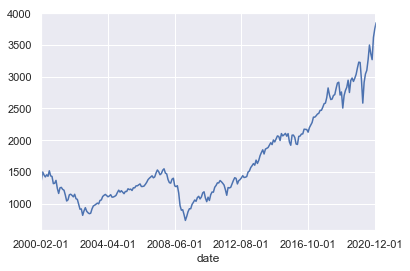

In [9]:
portfolio_return['price'].plot()

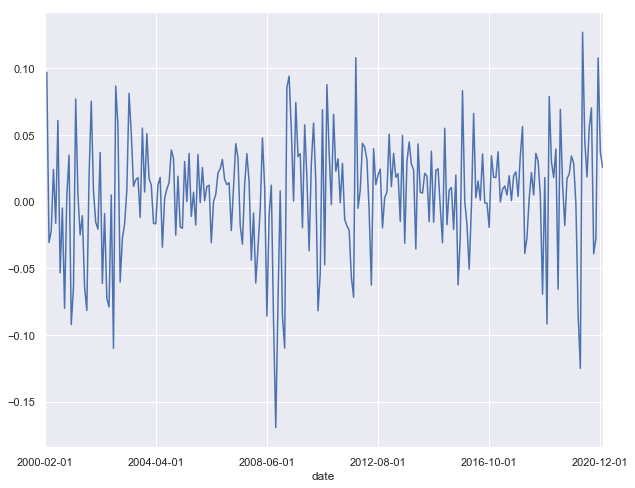

In [10]:
portfolio_return['returns_pct'].plot(figsize=(10,8))

In [11]:
#This is the average return from the S&P over 21 years 
avg_return = portfolio_return['returns_pct'].mean()
avg_return

0.005103615525239478

In [12]:
#This is the total risk 
risk = portfolio_return['returns_pct'].std()
risk

0.04374508961117184